INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 60, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 54005it [01:38, 548.87it/s]                           
INFO:root:Socjo finished in 4.706382254759471
Progress: 54005it [00:17, 3061.79it/s]                           
INFO:root:comparison finished in 3.80737761259079
INFO:root:best socjo 101.18529865194988 best single 197.54862515552372


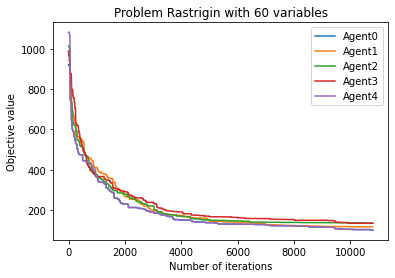

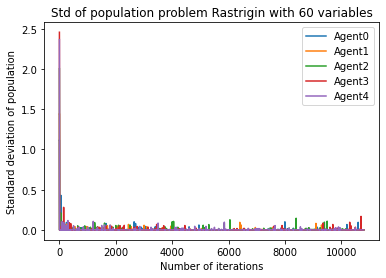

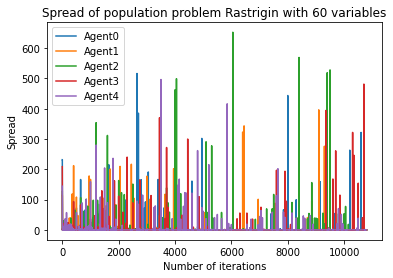

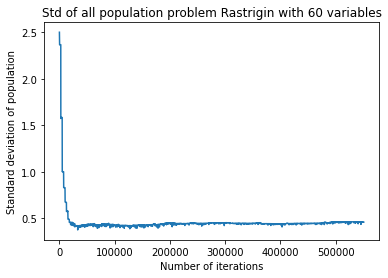

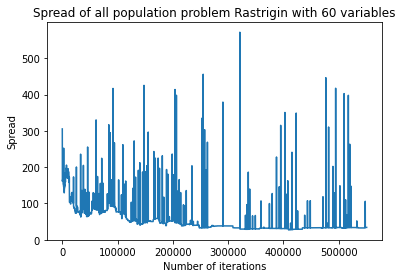

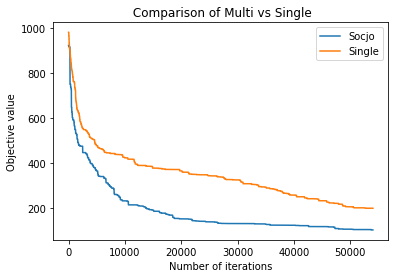

INFO:root:plotting finished in 0.0667957067489624
INFO:root:Run 0 out of 3
INFO:root:Socjo started


KeyboardInterrupt: 

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()

for config in ["config_A.json","config_G.json", "config_A.json"]:
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables * 500  
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner = StatisticRunner(runner)
    Statistic_runner.run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=2)
    if settings.enable_plots:
        Statistic_runner.plot()